# Dados

#### gender	
> genero
#### race/ethnicity	
> etnia
#### parental level of education	
> nível de escolaridade dos pais
1. alguma faculdade
2. grau de associado 
3. ensino médio 
4. algum colégio 
5. licenciatura 
6. mestrado

#### lunch	
#### test preparation course
> curso preparatório para testes	
#### math score	
> matematica pontos
#### reading score
> leitura pontos	
#### writing score
> escritura pontos

In [1]:
import copy 
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'dataset/StudentsPerformance.csv',sep=',')

# Verificar dados

In [10]:
data.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
data['race/ethnicity'].value_counts().reset_index()

,race/ethnicity,count
0,group C,319
1,group D,262
2,group B,190
3,group E,140
4,group A,89


In [5]:
data['parental level of education'].value_counts().reset_index()

,parental level of education,count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


In [6]:
data['lunch'].value_counts().reset_index()

,lunch,count
0,standard,645
1,free/reduced,355


In [8]:
data['test preparation course'].value_counts().reset_index()

,test preparation course,count
0,none,642
1,completed,358


# Analise

/home/mateus/MEGA/Projetos/DesempenhoNaEscola/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


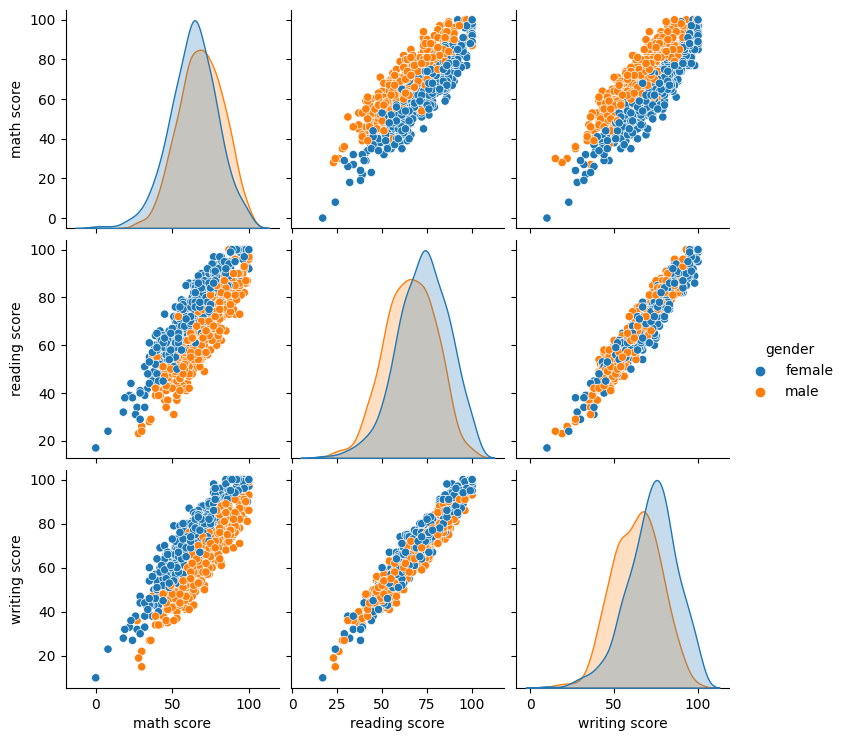

In [13]:
sea.pairplot( data ,hue='gender')
plt.show()